### 190648C
### VIKASITHA K.S.S.
#### ASSIGNMENT 01

[[ -7.64017944  -6.06507657]
 [ -5.46439065   8.76247066]
 [  9.28759605  -2.74163536]
 [ -3.31485473 -10.18035322]
 [  3.19207385   8.48713804]
 [  8.40227297  -5.48912241]
 [  6.40434396  -6.06791792]
 [ -2.13918842   9.66494639]
 [ -9.34040154  -3.6081975 ]
 [-10.54355788   1.66183779]
 [ -8.2115349    5.45726104]
 [ 10.10307513  -0.32259486]
 [  9.35742942   0.57364986]
 [  9.01395399  -2.00082312]
 [ -5.16736251   9.12290198]
 [ -1.39970386   9.2802    ]
 [  0.19028829   9.82022121]
 [  5.89573773  -8.15842355]
 [  9.86081204  -2.24681245]
 [-10.02214794   2.42837582]
 [ 10.05976308   1.00061281]
 [ -8.58971224  -4.11551424]
 [  8.20981305  -3.72320075]
 [  8.22483047   5.06915122]
 [  8.59711982  -3.39423233]
 [  1.5872727    9.83161766]
 [  2.98903289  -9.64806491]
 [  9.54814323   2.12393258]
 [  7.67024916  -4.93671464]
 [ -5.77552218   8.85435031]
 [  6.90128597   7.58482935]
 [  0.76534486   9.54174752]
 [ 10.3140995    0.79407991]
 [ -8.54866458  -3.66667585]
 [ -7.91692532

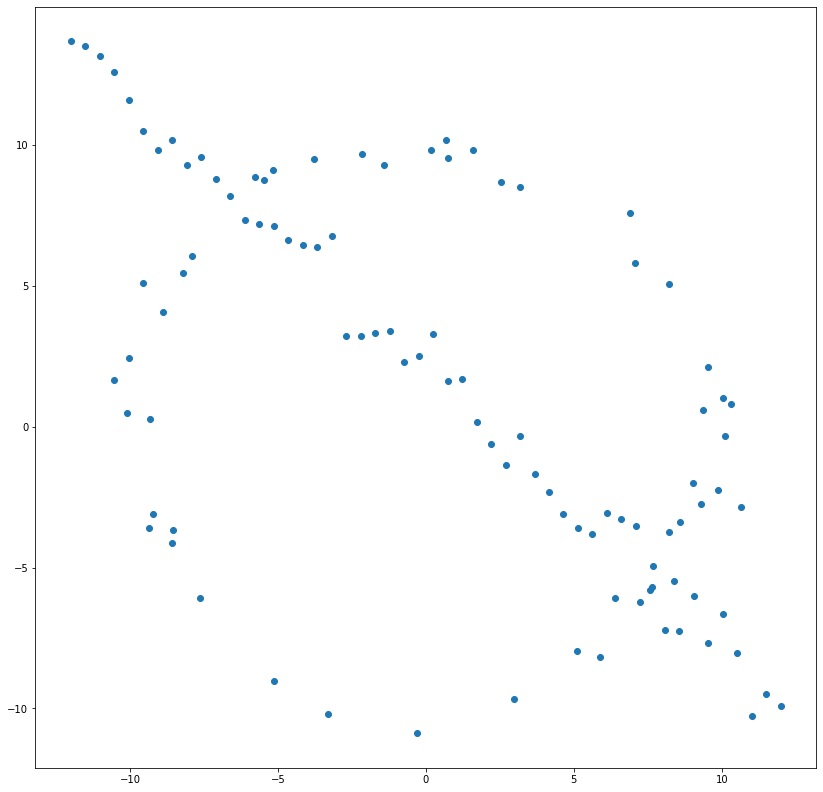

In [315]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
#np.random.seed(0)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x , y = (r + n)*np.cos(t) , (r + n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1) , y.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))
print(X)
fig, ax = plt.subplots(figsize=(14,14))
ax.scatter(X[:,0], X[:,1])
# ax.axis('off')
plt.show()

In [316]:
import random
b=random.sample(range(1, 100), 3)
b

[6, 74, 46]

In [317]:
X[0]

array([-7.64017944, -6.06507657])

[80, 19, 84]
[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[  2.69387755  -1.36601847]
 [-10.02214794   2.42837582]
 [  4.65306122  -3.11347189]]
[[  2.69387755  -1.36601847   1.        ]
 [-10.02214794   2.42837582   1.        ]
 [  4.65306122  -3.11347189   1.        ]]
[[  -9.12298271]
 [-106.3404585 ]
 [ -31.34468598]]
[[ 17.19113171]
 [ 31.9907169 ]
 [-11.73387647]]
[-8.59556586] [-15.99535845] [18.47888311]


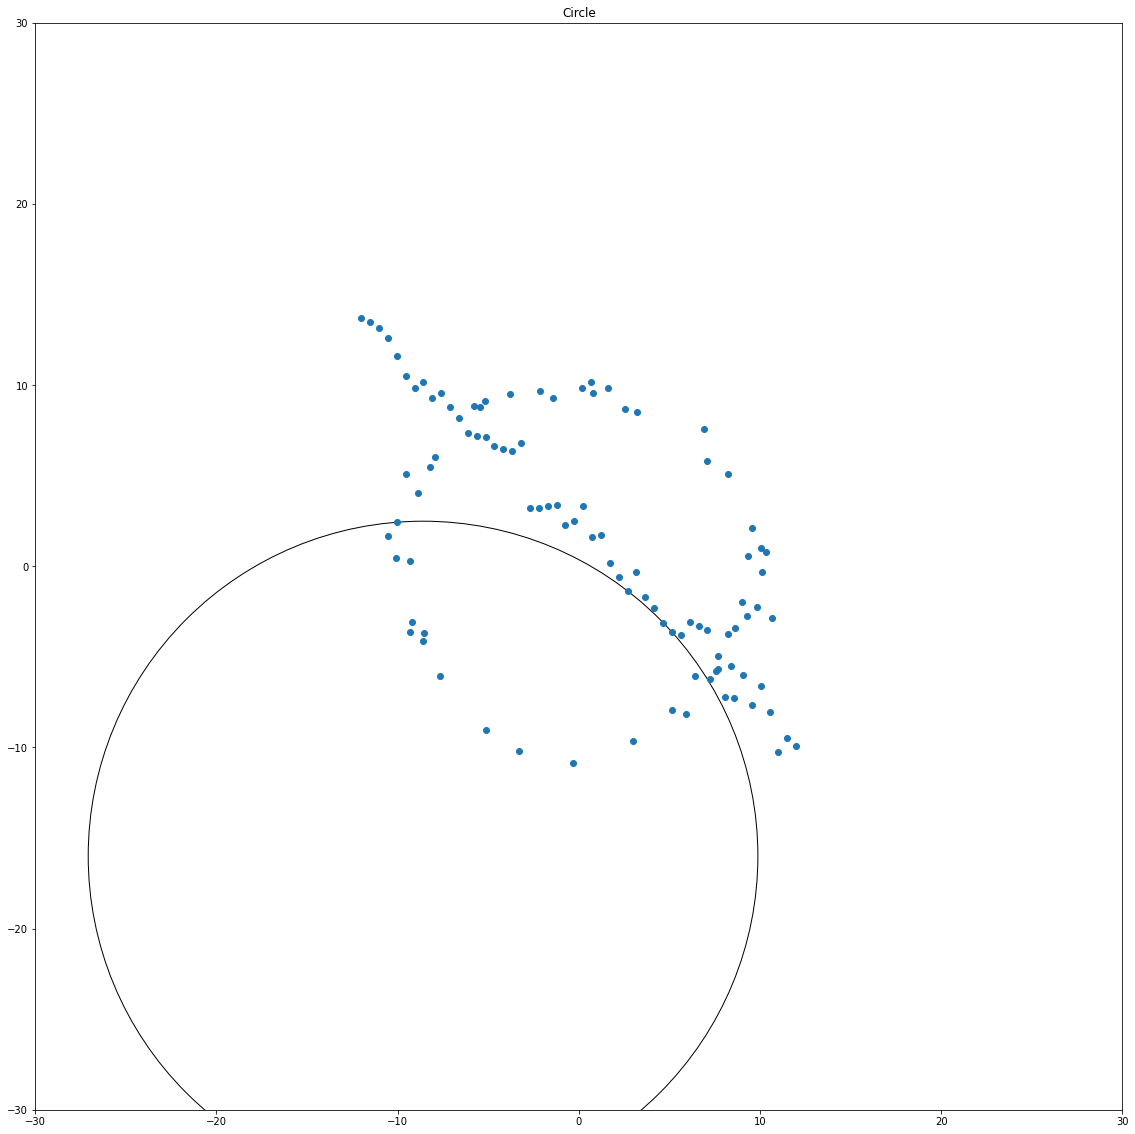

In [318]:
import random
b=random.sample(range(1, N), 3)
print(b)
x1=np.zeros([3,2])
print(x1)
for i in range(3):
    x1[i]=X[b[i]]
print(x1)

x2 = np.hstack((x1,np.ones((3,1))))
print(x2)

x3 = -1*((x1[:,0]*x1[:,0])+(x1[:,1]*x1[:,1]))
x3=x3.reshape(3,1)
print(x3)

c=np.matmul(np.linalg.inv(x2),x3)
print(c)
c_x=-c[0]/2
c_y=-c[1]/2
radius = np.sqrt(c_x*c_x + c_y*c_y - c[2])

print(c_x,c_y,radius)

figure, axes = plt.subplots(figsize=(20,20))
draw_circle = plt.Circle((c_x, c_y), radius,fill=False)

axes.set_aspect(1)
axes.add_artist(draw_circle)
axes.scatter(X[:,0], X[:,1])
plt.title('Circle')
plt.xlim(-30,30)
plt.ylim(-30,30)
plt.show()


In [319]:
def isInlier(x,y,cx,cy,r):
    r_=(x-cx)**2+(y-cy)**2
    if r-0.8 < np.sqrt(r_) < r+0.8:
        return True
    else: return False

def inlierCount(points,cx,cy,r):
    n=0
    for i in points:
        if isInlier(i[0],i[1],cx,cy,r):
            n+=1
    return n

print(inlierCount(X,c_x,c_y,radius))

16


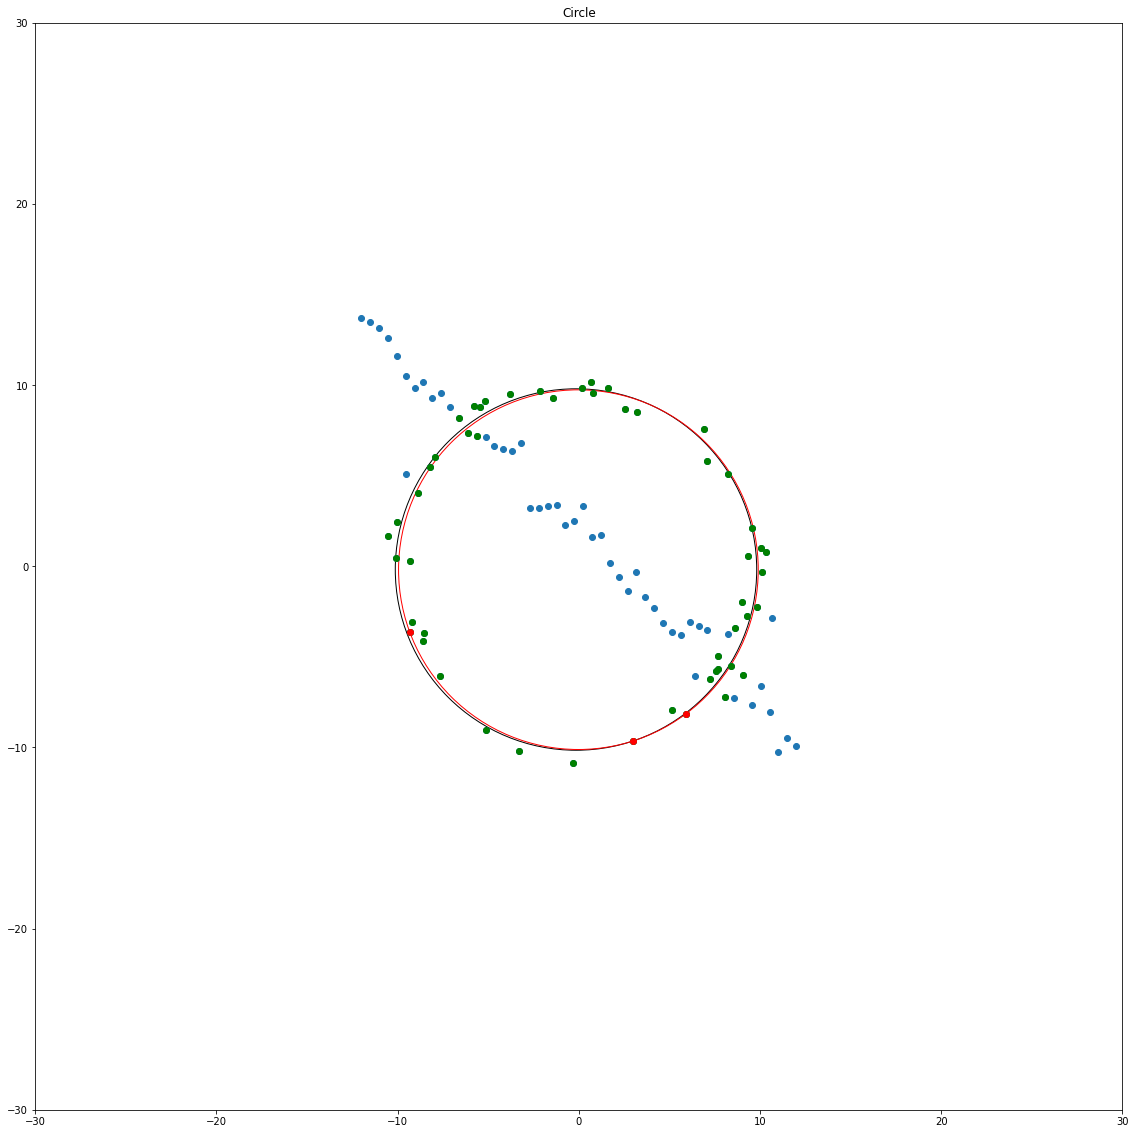

53 52


In [320]:
import random


def isInlier(x,y,cx,cy,r):
    r_=(x-cx)**2+(y-cy)**2
    if r-0.9 < np.sqrt(r_) < r+0.9:
        return True
    else: return False

def inlierCount(points,cx,cy,r):
    n=0
    inlier_arr=np.zeros((1,2))
    for i in points:
        if isInlier(i[0],i[1],cx,cy,r):
            n+=1
            if not inlier_arr.any():
                inlier_arr[0]=i
            else:
                inlier_arr=np.concatenate((inlier_arr,[i]),axis=0)
    return n,inlier_arr

its = 250
maxins=0
circ=[]
while maxins<42 or its>0:
    b=random.sample(range(1, N), 3)
    x1=np.zeros([3,2])
    for i in range(3):
        x1[i]=X[b[i]]

    x2 = np.hstack((x1,np.ones((3,1))))
    x3 = -1*((x1[:,0]*x1[:,0])+(x1[:,1]*x1[:,1]))
    x3=x3.reshape(3,1)
    c=np.matmul(np.linalg.inv(x2),x3)
    c_x=-c[0]/2
    c_y=-c[1]/2
    radius = np.sqrt(c_x*c_x + c_y*c_y - c[2])
    if radius>30:continue
    inls,arr = inlierCount(X,c_x,c_y,radius)
    
    if maxins < inls:
        maxins=inls
        circ=[c_x,c_y,radius]
        inlLs=arr
    if maxins>=40:
        its-=1
# print(inlLs)
figure, axes = plt.subplots(figsize=(20,20))
draw_circle = plt.Circle((circ[0], circ[1]), circ[2],fill=False)

axes.set_aspect(1)
axes.add_artist(draw_circle)

NN=maxins
its = 250
maxins=0
circ=[]
best=np.zeros([3,2])
while maxins<43 or its>0:
    b=random.sample(range(1, NN), 3)
    x1=np.zeros([3,2])
    for i in range(3):
        x1[i]=inlLs[b[i]]

    x2 = np.hstack((x1,np.ones((3,1))))
    x3 = -1*((x1[:,0]*x1[:,0])+(x1[:,1]*x1[:,1]))
    x3=x3.reshape(3,1)
    c=np.matmul(np.linalg.inv(x2),x3)
    c_x=-c[0]/2
    c_y=-c[1]/2
    radius = np.sqrt(c_x*c_x + c_y*c_y - c[2])
    if radius>30:continue
    inls,arr = inlierCount(X,c_x,c_y,radius)
    
    if maxins < inls:
        maxins=inls
        circ=[c_x,c_y,radius]
        best=x1
        inlLLs=arr
    if maxins>=40:
        its-=1

draw_circle = plt.Circle((circ[0], circ[1]), circ[2],fill=False,color='r')
axes.add_artist(draw_circle)
axes.scatter(X[:,0], X[:,1])
axes.scatter(inlLLs[:,0], inlLLs[:,1],color='g')
axes.scatter(best[:,0], best[:,1],color='r')
plt.title('Circle')
plt.xlim(-30,30)
plt.ylim(-30,30)
plt.show()

print(NN,maxins)